In [1]:


import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K

from keras.datasets import cifar10



# Load the data

In [2]:
# (x_train, y_train),(x_test,y_test) = cifar10.load_data()

import pickle

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_data():
    x_train = []
    y_train = []

    # Iterate through all training batches, and load them in memory.
    for i in range(1, 6):
        path = "cifar-10-batches-py/data_batch_" + str(i)
        d = unpickle(path)
        # Add the training data to our datastructures.
        num_instances = len(d[b'data'])
        for j in range(0, num_instances):
            x_train.append(d[b'data'][j])
            y_train.append(d[b'labels'][j])

    x_test = []
    y_test = []

    # Load the test batch.
    path = "cifar-10-batches-py/test_batch"
    d = unpickle(path)
    # Add the testset to our datastructures.
    num_instances = len(d[b'data'])
    for j in range(0, num_instances):
        x_test.append(d[b'data'][j])
        y_test.append(d[b'labels'][j])

    train_len = len(x_train)
    test_len = len(x_test)

    return (np.stack(x_train).reshape(train_len,3,32,32).transpose((0,2,3,1)), np.stack(y_train)), (np.stack(x_test).reshape(test_len,3,32,32).transpose((0,2,3,1)) , np.stack(y_test))

In [3]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = load_data()

print("Number of training instances: " + str(len(x_train)))
print("Number of test instances: " + str(len(x_test)))


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)


Number of training instances: 50000
Number of test instances: 10000


# Define the Model

In [4]:


input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)


model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


# Compile and train the model

In [5]:


input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)



In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

# train

In [8]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [9]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.5631 - accuracy: 0.4531 - val_loss: 1.1827 - val_accuracy: 0.5696
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1733 - accuracy: 0.5841 - val_loss: 1.1901 - val_accuracy: 0.5751
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0197 - accuracy: 0.6435 - val_loss: 1.0366 - val_accuracy: 0.6253
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9232 - accuracy: 0.6770 - val_loss: 1.0518 - val_accuracy: 0.6241
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8620 - accuracy: 0.6993 - val_loss: 1.1641 - val_accuracy: 0.6027
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8079 - accuracy: 0.7182 - val_loss: 0.8660 - val_accuracy: 0.6996
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7625 - accuracy: 0.7325 - val_loss: 1.0089 -

In [15]:
model.layers[6].get_weights()

[]

# Analysis

In [16]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 2s 161ms/step - loss: 0.8270 - accuracy: 0.7152


[0.8269522190093994, 0.7152000069618225]

In [17]:


CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]



313/313 [==============================] - 4s 12ms/step


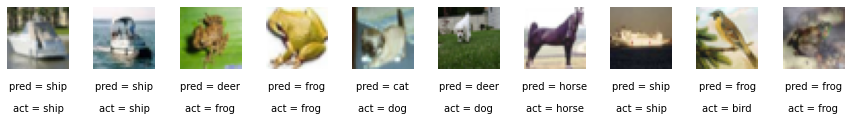

In [18]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)